# Heart Failure Prediction
This project is to predict whether a patient is prone to heart failure.


# Imported All the necessary libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.colors as colors
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset (1).csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

# Exploratory Data Analysis

In [3]:
#Display the dimension of the dataset:
print('no of rows ',df.shape[0])
print('no of columns ',df.shape[1])

no of rows  299
no of columns  13


In [4]:
#Display the column names of dataset:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
#print the first ten rows of the data frame:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [6]:
df.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [7]:
#Print the Data types of the columns :
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
#Display the general Statistics about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
#Display the general Statistics about the dataset:
df.describe(include = 'all')

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [10]:
#Check are there any missing values in the columns of data frame:
df.isnull().any()


age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [11]:
#Count the missing values in the columns of the data frame:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Clealy, there are no null values in the dataset as observed above so we don't need to treat any columns for null values.

In [12]:
woman = len(df.query("sex==0"))
man =  len(df) - woman
print(f"The dataset contains {man} male patients and {woman} female patients.")

The dataset contains 194 male patients and 105 female patients.


# Univariate Analysis

In [13]:
#Value counts for DEATH_EVENT column:
ValueCounts_DEATH_EVENT = df['DEATH_EVENT'].value_counts()
ValueCounts_DEATH_EVENT 

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:

import plotly.express as px
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

# Feature Selection
Using ExtraTreesClassifier :

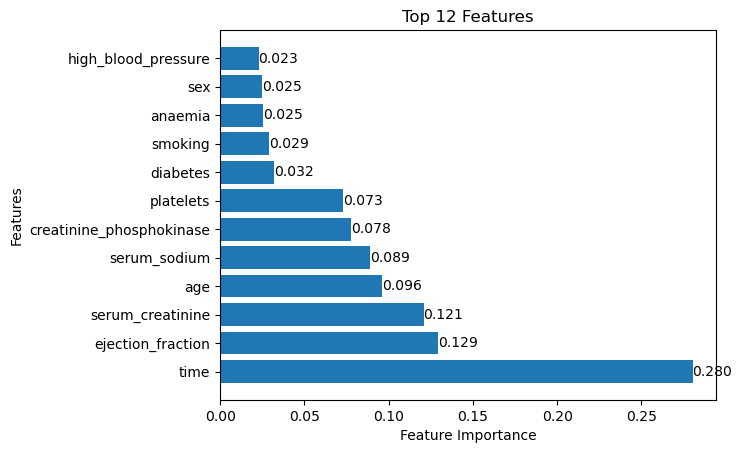

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Assuming df is your DataFrame
model = ExtraTreesClassifier()
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
top_features = feat_importances.nlargest(12)

# Plot the top features with annotations
fig, ax = plt.subplots()
bars = plt.barh(top_features.index, top_features.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 12 Features')

# Add annotations with feature values
for bar, value in zip(bars, top_features.values):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.3f}', va='center')

plt.show()


From the above graph we can see that time, ejection_fraciton, serum_creatinine, age, serum_sodium has the most feature importance on predicting the DEATH_EVENT.

In [16]:
fig = make_subplots(
    rows=3, cols=2, subplot_titles=('<b>Distribution Of Anemia<b>','<b>Distribution Of Diabetes<b>','<b>Distribution Of High blood Pressure<b>',
                                   '<b>Distribution Of Sex<b>','<b>Distribution Of Smoking Status<b>', '<b>Distribution Of Death Event<b>'),
    vertical_spacing=0.01,
    specs=[[{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ]
           
)
fig.add_trace(
    go.Pie(values=df.anaemia.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],
           hole=0.3,pull=[0,0.08,0.2],marker_colors=['#dcd6f7','#a6b1e1'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=df.diabetes.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#393E46', '#a696c8'],textposition='inside'),
    row=1, col=2
)


fig.add_trace(
    go.Pie(values=df.high_blood_pressure.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#dcd6f7', '#424874'],textposition='inside'),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values=df.sex.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#a45fbe', '#a6b1e1'],textposition='inside'),
    row=2, col=2
)



 
fig.add_trace(
    go.Pie(values=df.smoking.value_counts().values,labels=['<b>Private<b>', '<b>Self-employed<b>', '<b>Govt_job<b>', '<b>children<b>', '<b>Never_worked<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#77529e',  '#a5bdfd'],textposition='inside'),
    row=3, col=1
    
)
fig.add_trace(
    go.Pie(values=df.DEATH_EVENT.value_counts().values,labels=['<b>Urban<b>', '<b>Rural<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#dcb5ff', '#a5bdfd'],textposition='inside'),
    row=3, col=2
) 

 
    
fig.update_layout(
    height=1200,
    showlegend=True,
    title_text="<b>Distribution of Categorical Varibles<b>",
)
fig.show()

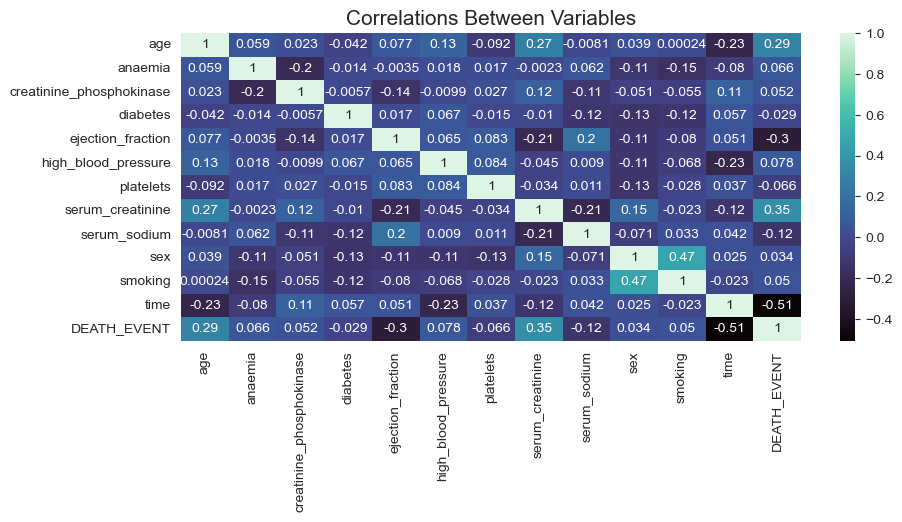

In [41]:
#Using Correlation Heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

In [18]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']


age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with DEATH_EVENT

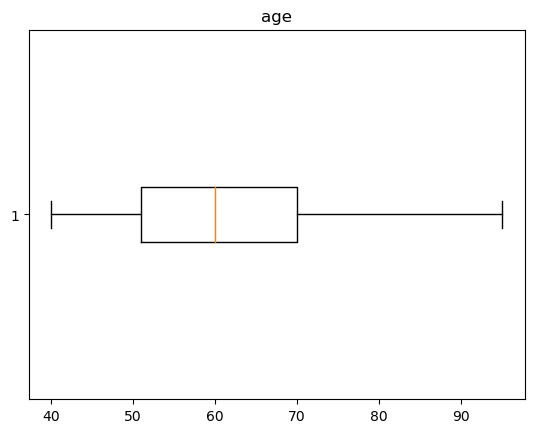

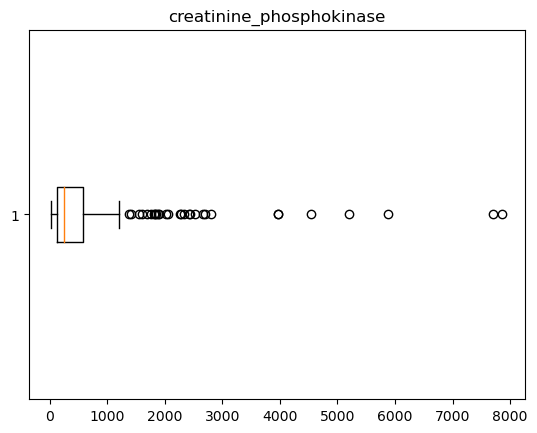

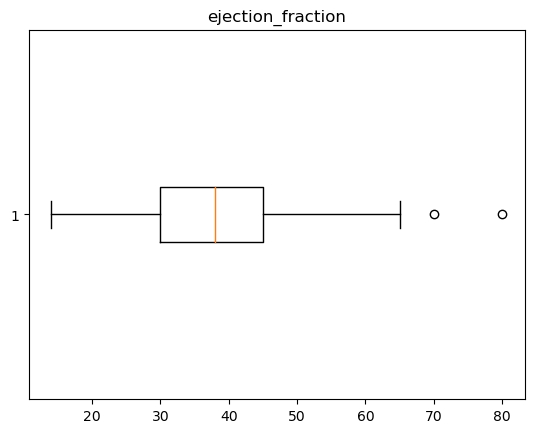

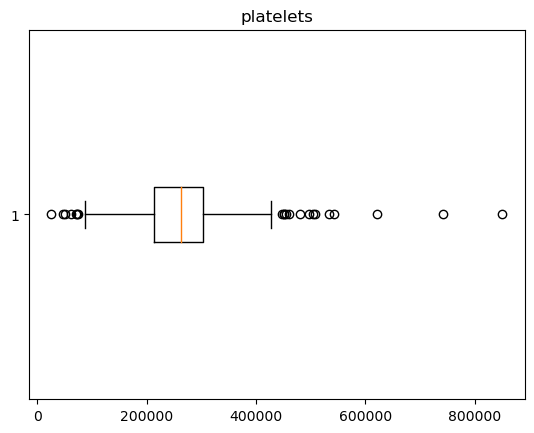

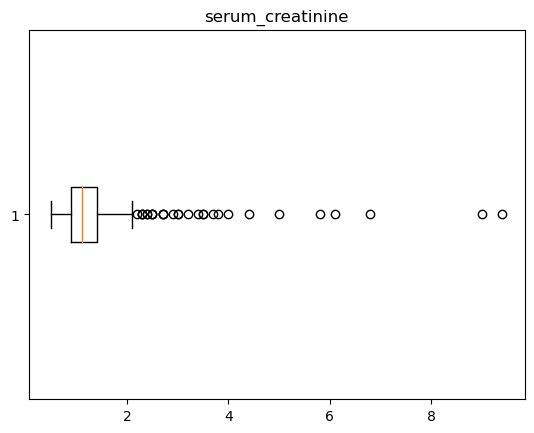

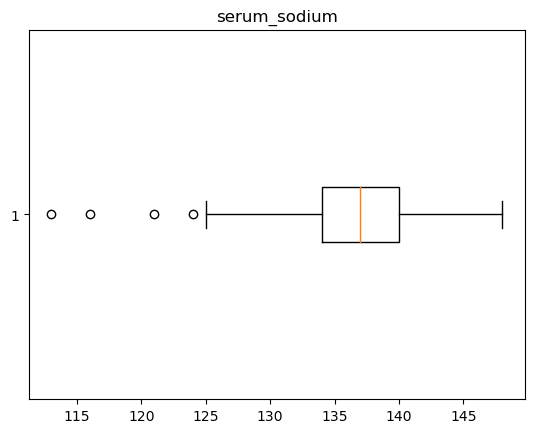

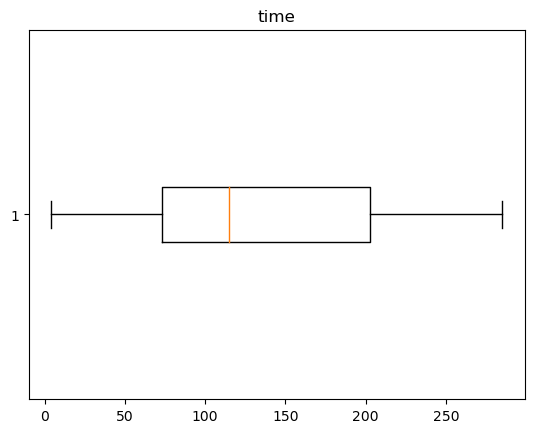

In [19]:
#Handling the outliers
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

In [20]:
def remove_outliers(df):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df= remove_outliers(df)

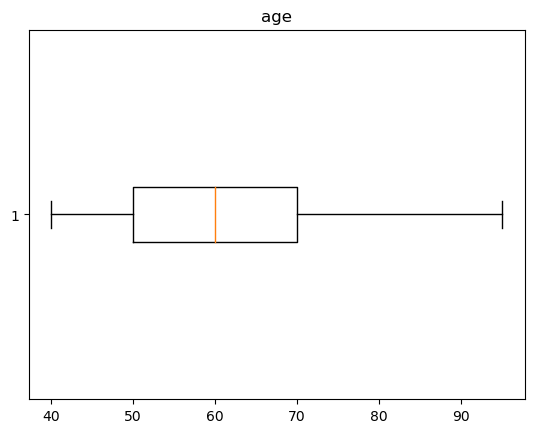

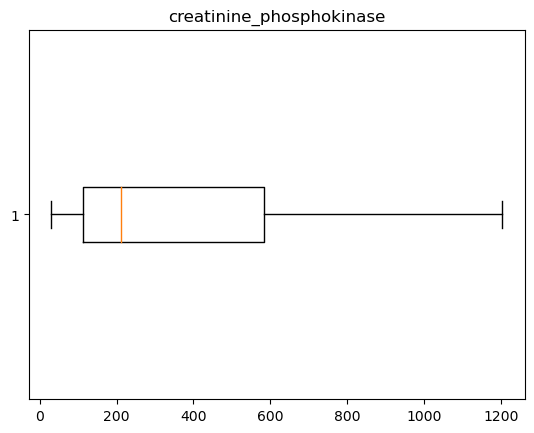

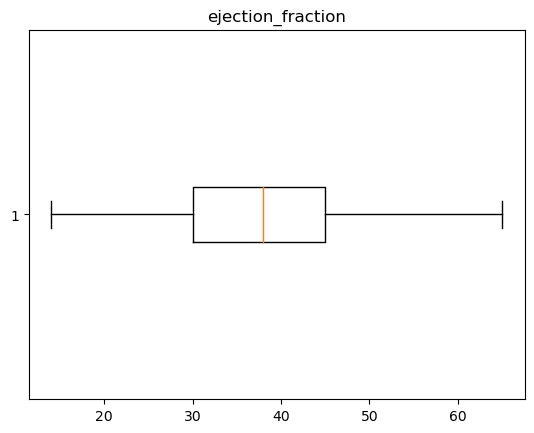

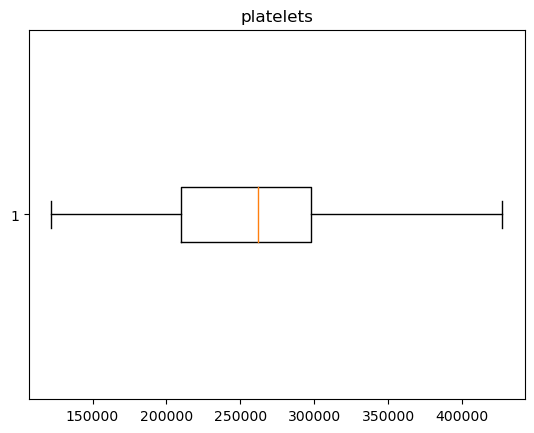

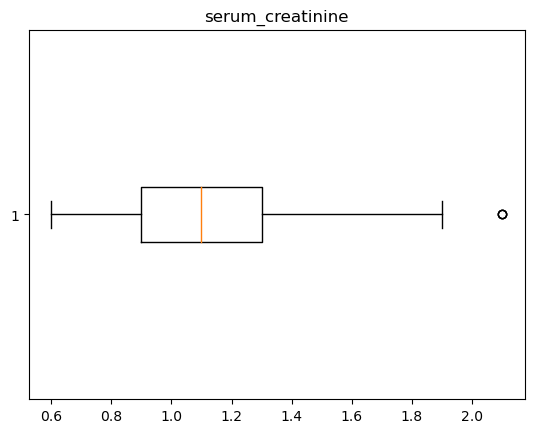

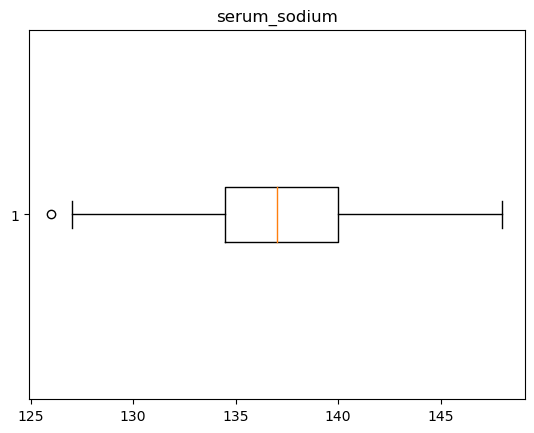

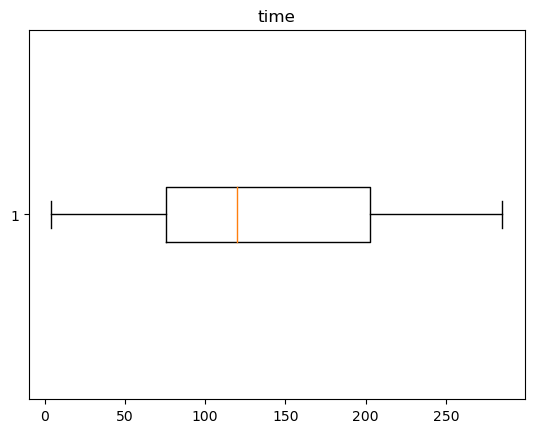

In [21]:
#Handling the outliers
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

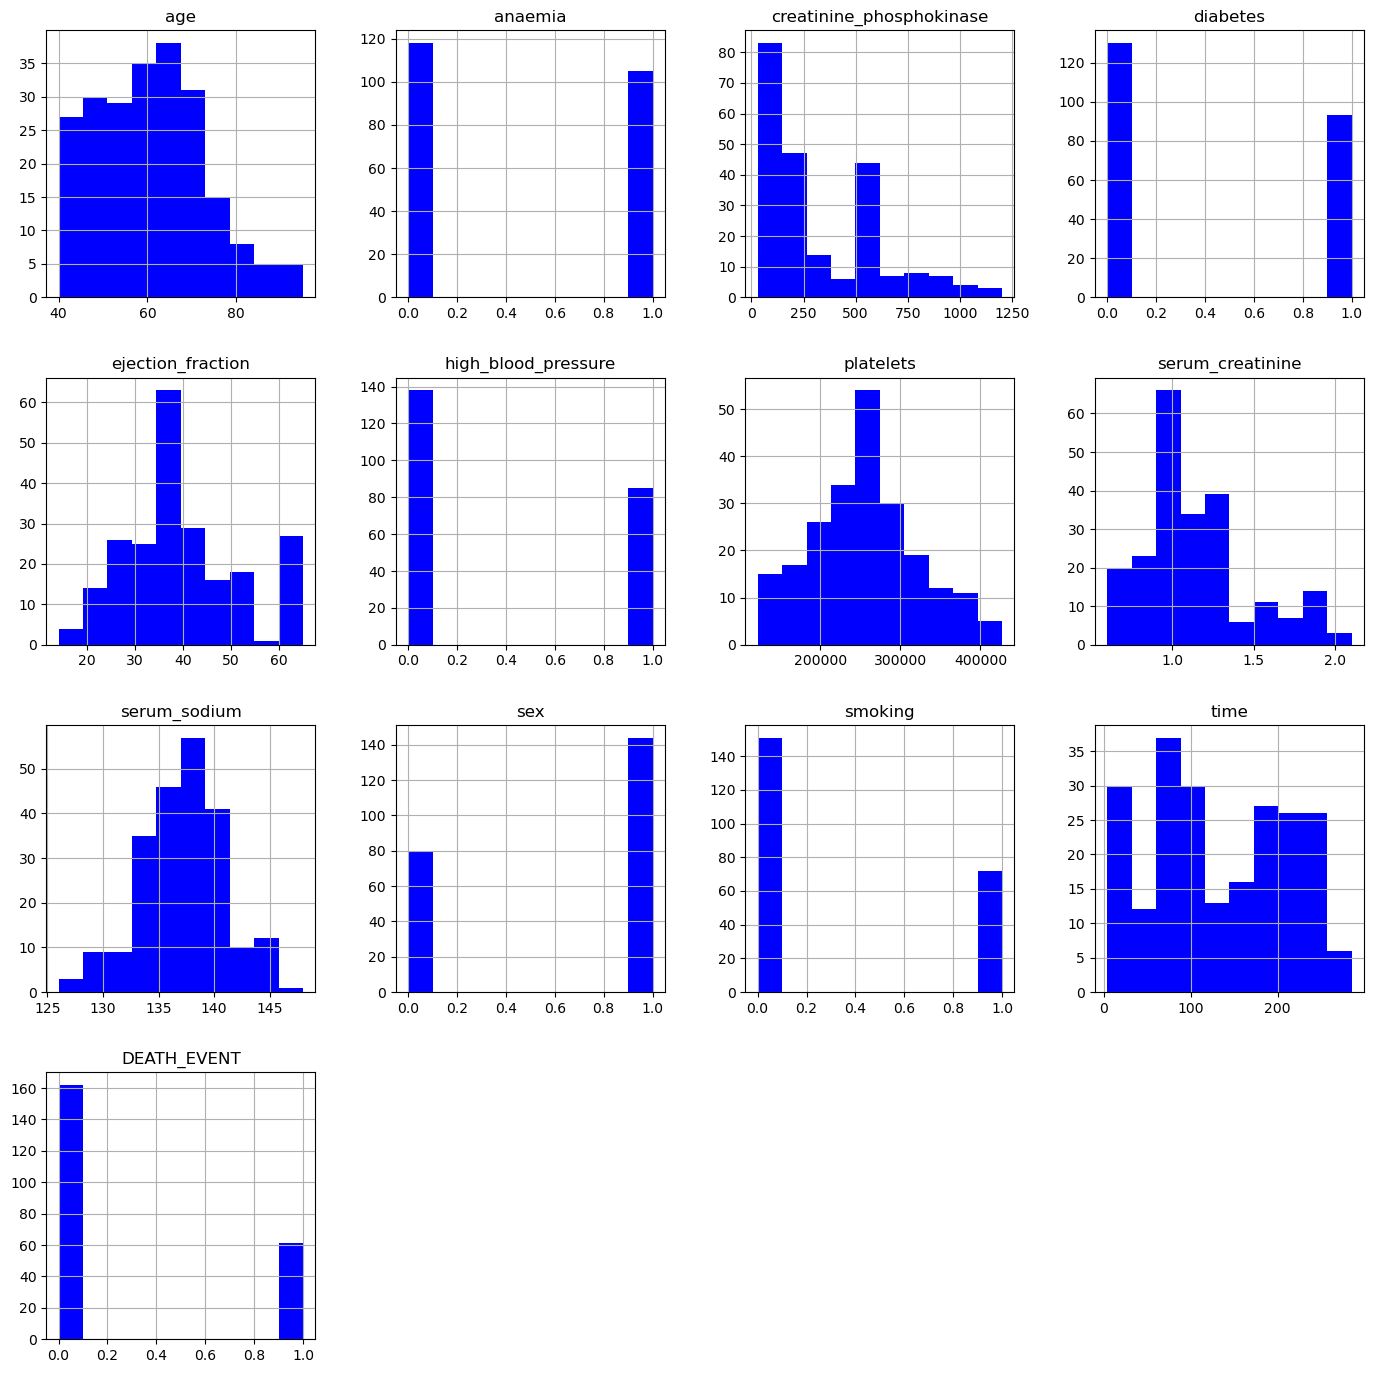

In [22]:
# plot histograms for each numerical variable
df.hist(figsize = (17, 17),color='blue')
plt.show()

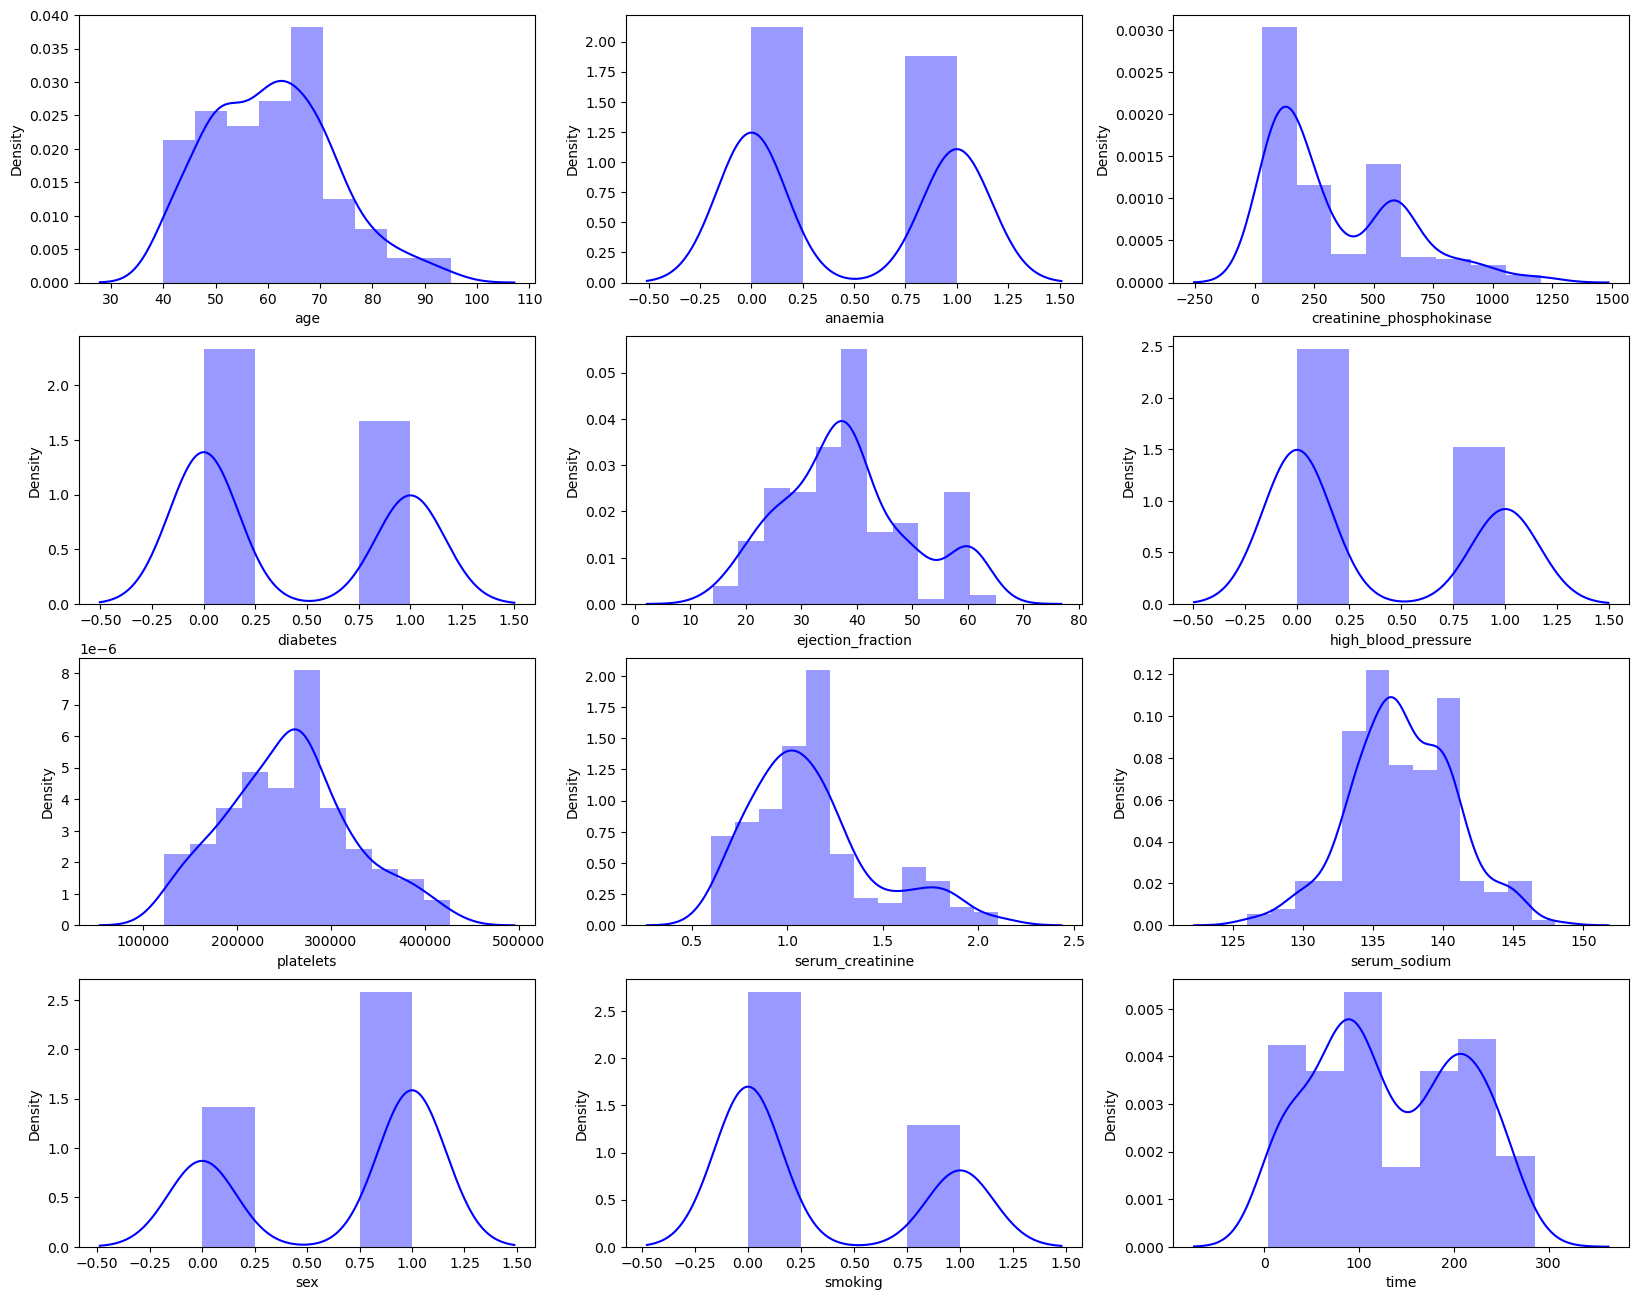

In [23]:
plt.figure(figsize=(20,16))
ddf=df.drop('DEATH_EVENT',axis=True)
for i,column in enumerate(ddf.columns,1):
    plt.subplot(4,3,i)
    sns.distplot(ddf[column],hist=True,color="blue")
plt.show()

# Machine learning models

independent and dependent variables :

In [24]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [25]:
#Train, Test splitting :
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
#standardizing data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
accuracy_list= []

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.87        45
weighted avg       0.91      0.89      0.88        45



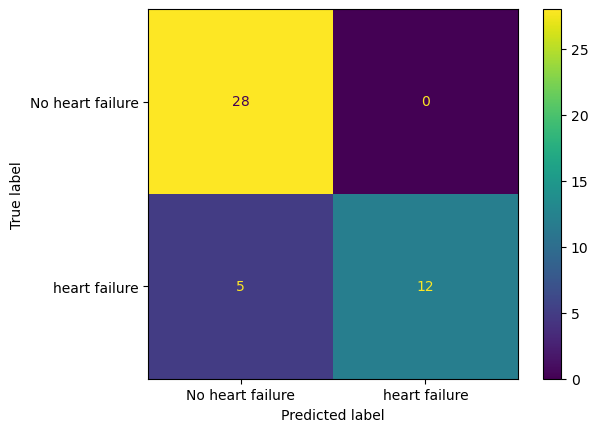

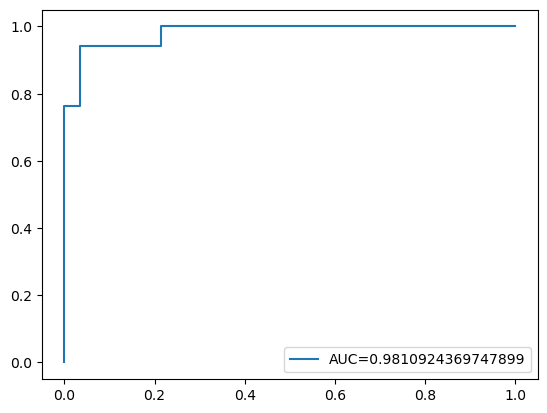

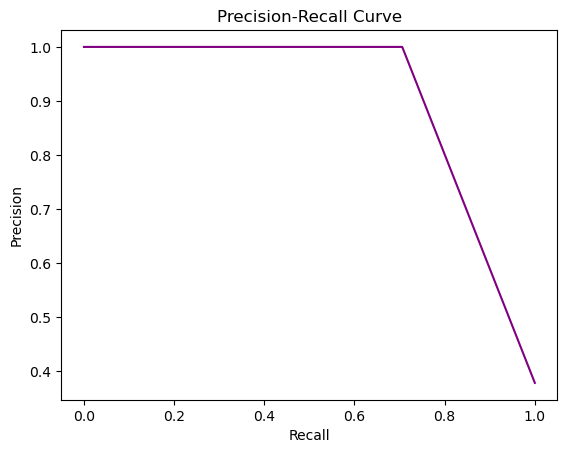

In [28]:
#Logistic Regression:
#implementation

log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#evaluation

log_reg_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, y_pred))

# confusion matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        28
           1       1.00      0.53      0.69        17

    accuracy                           0.82        45
   macro avg       0.89      0.76      0.78        45
weighted avg       0.86      0.82      0.81        45



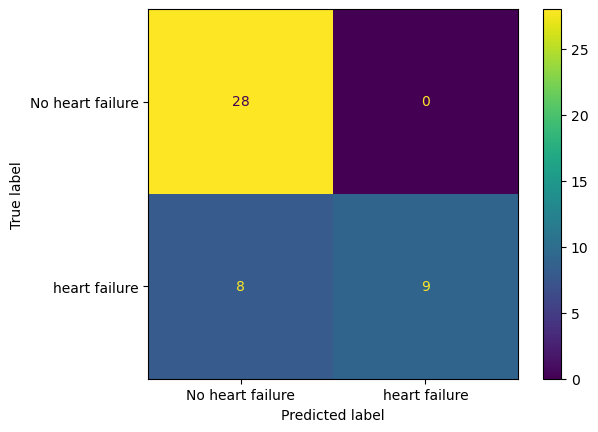

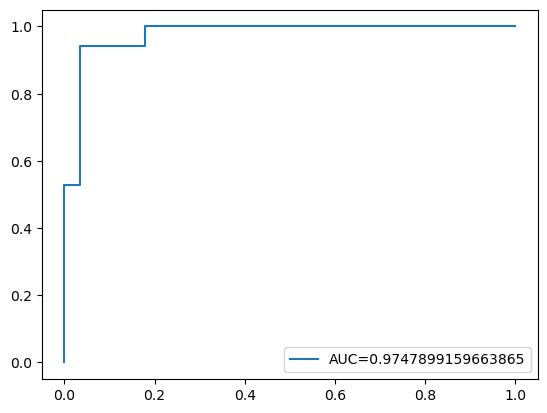

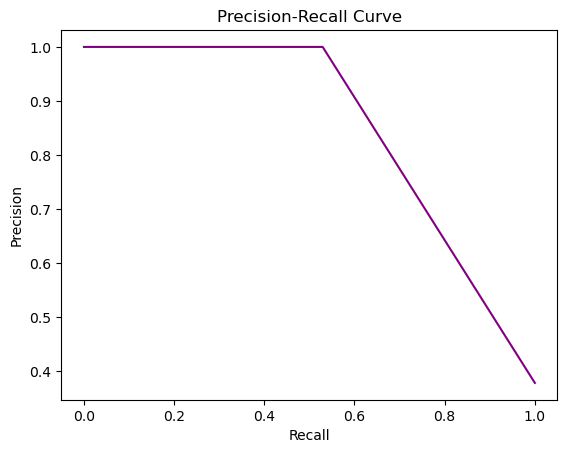

In [29]:
#SVM:
# Initialize the SVC model with probability=True
svm = SVC(random_state=1, probability=True)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

# Evaluation
svm_acc = accuracy_score(y_test, svm_pred)
accuracy_list.append(100*svm_acc)
print(classification_report(y_test, svm_pred))

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, svm_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.41      0.58        17

    accuracy                           0.78        45
   macro avg       0.87      0.71      0.72        45
weighted avg       0.84      0.78      0.75        45



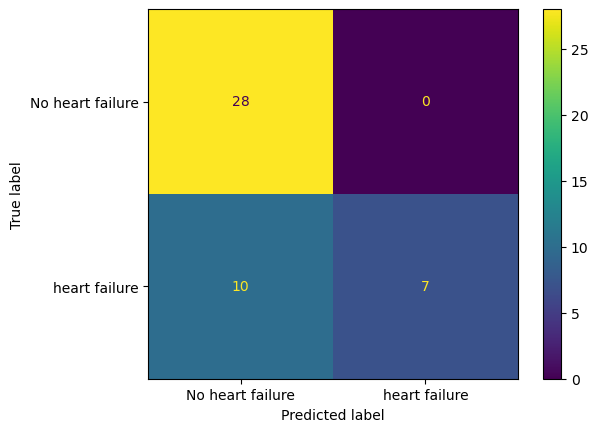

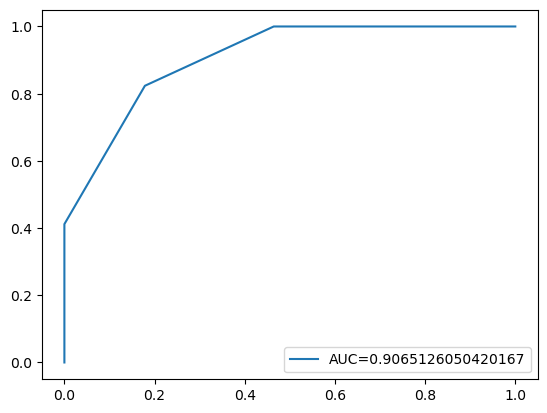

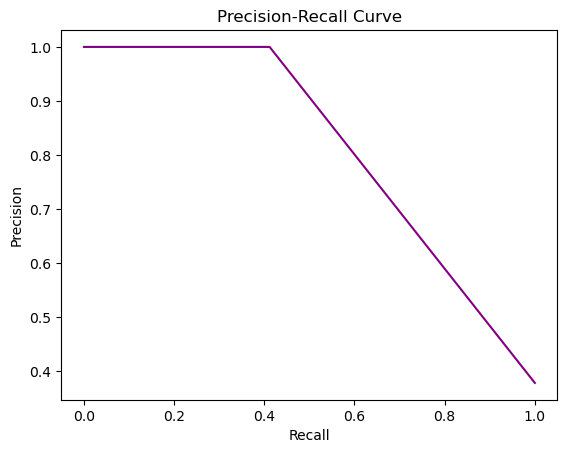

In [30]:
#K Neighbors Classifier:
# implementation


kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)

# evaluation

kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(classification_report(y_test, kn_pred))

# confusion matrix

cm = confusion_matrix(y_test, kn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = kn_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, kn_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



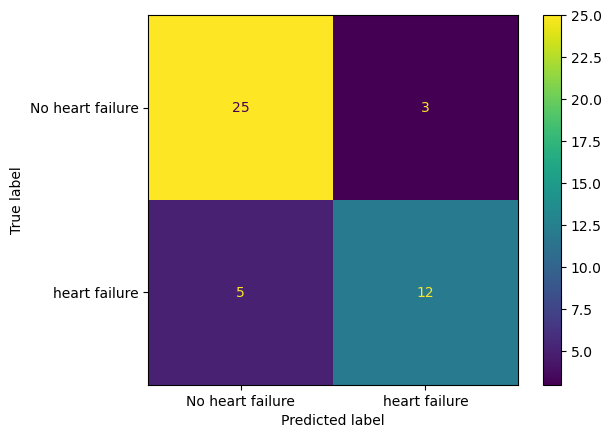

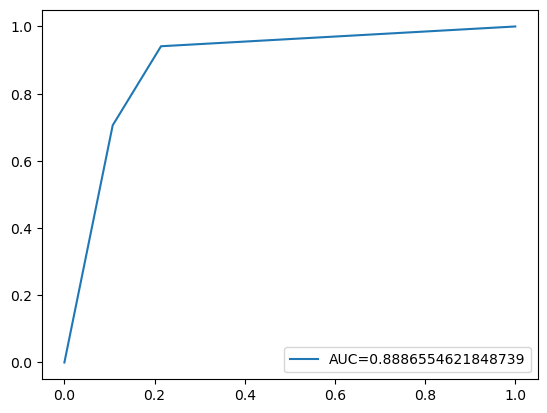

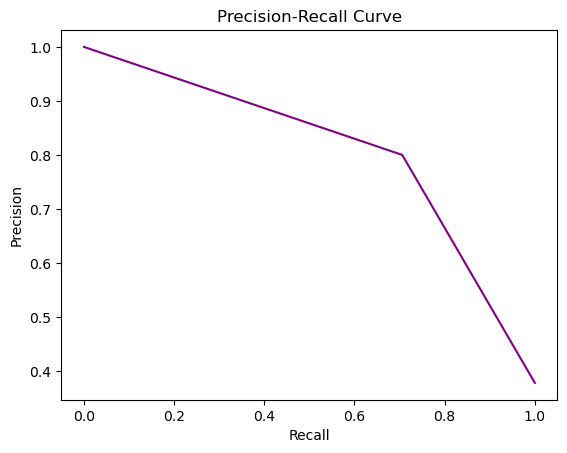

In [31]:
#Decision Tree Classifier :
from sklearn.tree import DecisionTreeClassifier

# implementation

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

# evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

# confusion matrix

cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = dt_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, dt_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()



              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.81      0.76      0.79        17

    accuracy                           0.84        45
   macro avg       0.84      0.83      0.83        45
weighted avg       0.84      0.84      0.84        45



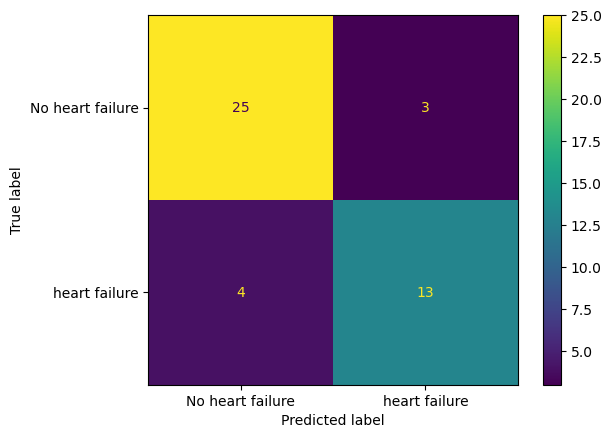

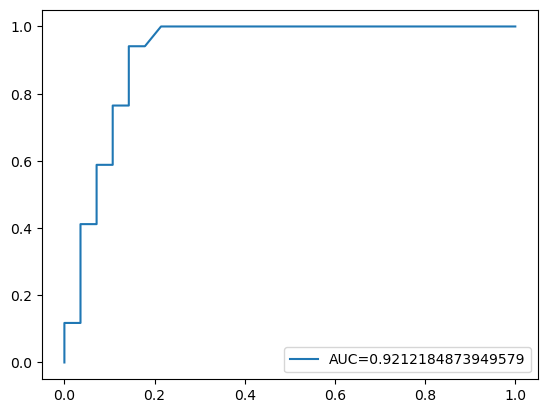

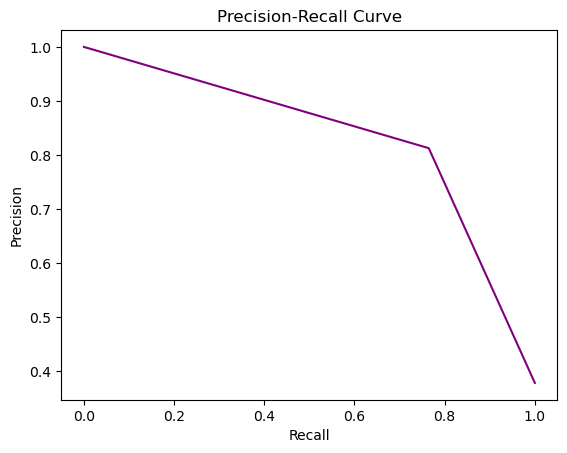

In [32]:
#Random Forest Classifier :
# implementation
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

# evaluation

r_clf_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_clf_acc)
print(classification_report(y_test, r_pred))

# confusion matrix

cm = confusion_matrix(y_test, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = r_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, r_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.86      0.71      0.77        17

    accuracy                           0.84        45
   macro avg       0.85      0.82      0.83        45
weighted avg       0.85      0.84      0.84        45



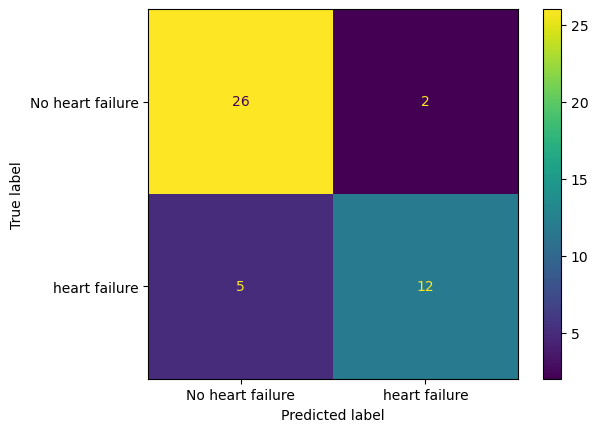

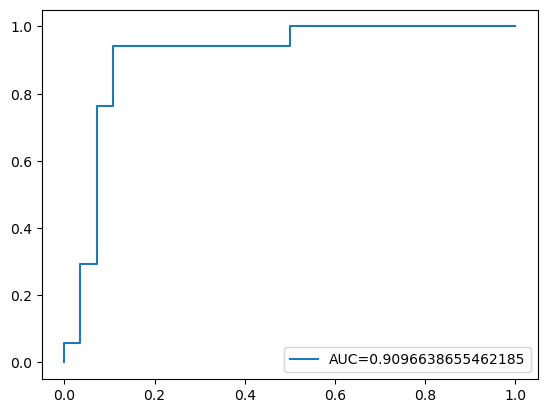

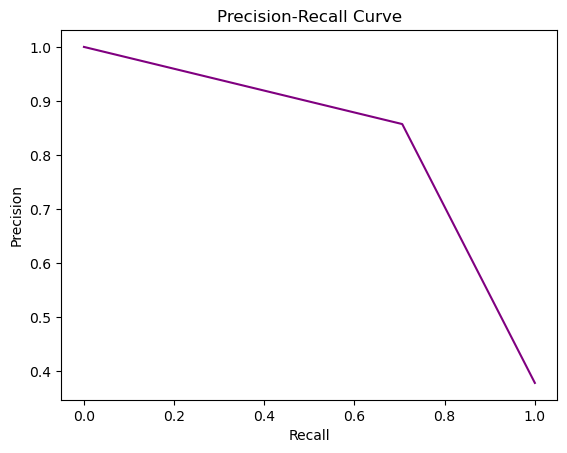

In [33]:
#Gradient Boosting Classifier :
# implementation

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)

# evaluation

gradientboost_clf_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_clf_acc)
print(classification_report(y_test, gradientboost_pred))

# confusion matrix

cm = confusion_matrix(y_test, gradientboost_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = gradientboost_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, gradientboost_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# Comparing models 

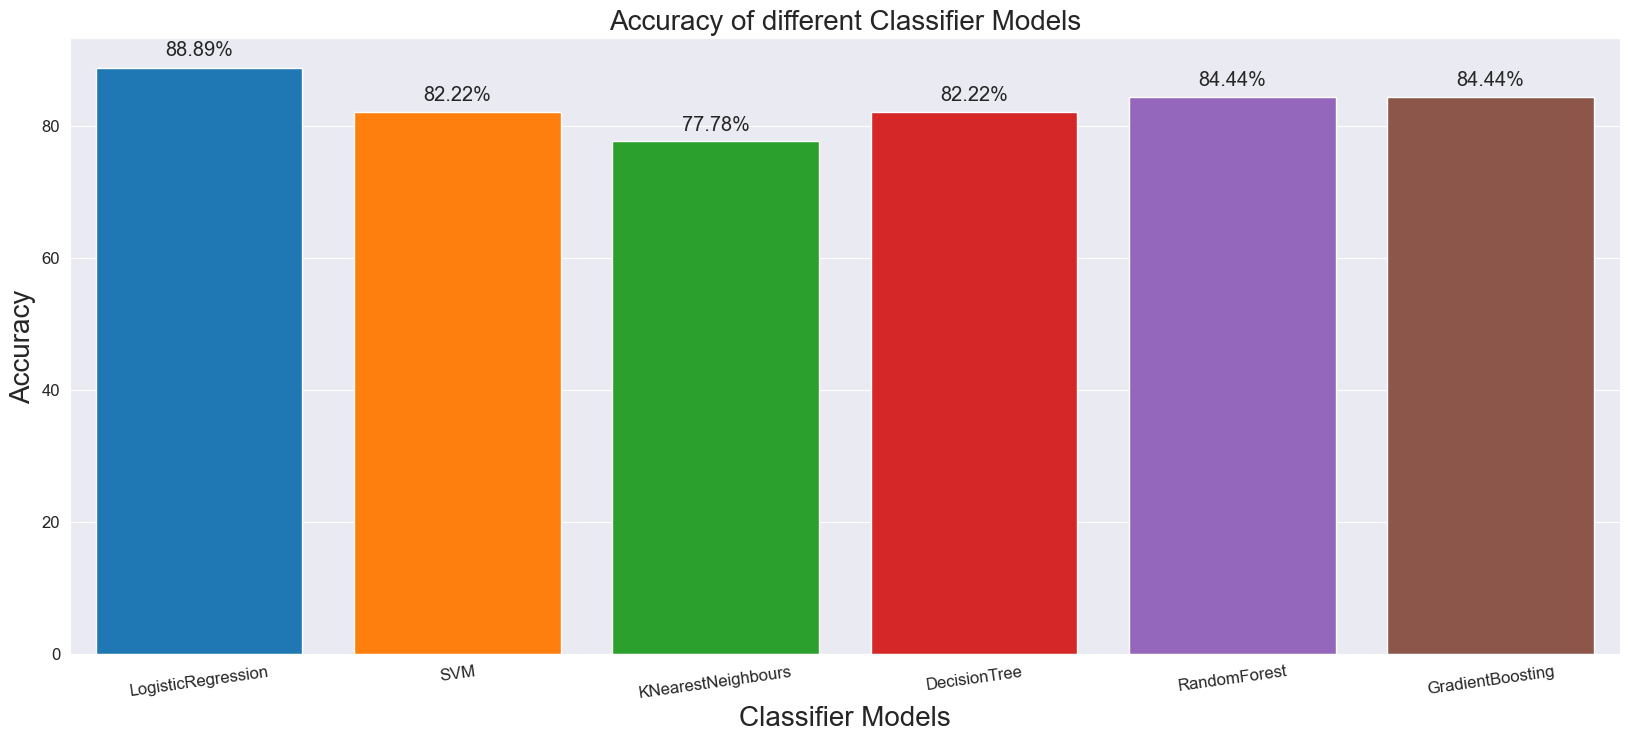

In [34]:
model_list = ['LogisticRegression', 'SVM','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBoosting']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [35]:
#Comparison
data={'Estimators':['LogisticRegression', 'SVM','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBoosting'],
      'Accuracy':[log_reg_acc,svm_acc,kn_acc,dt_acc,r_clf_acc,r_clf_acc]}

data =pd.DataFrame(data)

data.sort_values('Accuracy', ascending=False)

Estimators  Accuracy
0  LogisticRegression  0.888889
4        RandomForest  0.844444
5    GradientBoosting  0.844444
1                 SVM  0.822222
3        DecisionTree  0.822222
2  KNearestNeighbours  0.777778

Hence from the above comparison of the models in terms of accuracy we can see that Logistic Regression model out performed all the other models by giving the highest accuracy of 88.89% and Random Forest model and Gradient Boosting comes at second position by giving an accuracy score of 84.44%.